# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# Install shash package (Custom Package)
!pip install shash==0.1.1

## 0. Import Packages

In [ ]:
# Pandas for data handling
import pandas as pd

# NumPy for numerical computations
import numpy as np

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ensures that Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Seaborn for statistical data visualization
import seaborn as sns

In [5]:
# Set the outputs to display maximum number of rows and columns for better visiblity (let's say 100)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  

---
## A. Project Description


In [6]:
# Student Information
student_name = "Shashikanth Senthil Kumar"
student_id = "25218722"
group_id = "9"

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [8]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [9]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [10]:
business_use_case_description = """
Support NBA teams, scouts, and analysts in identifying college basketball players most likely to be drafted, reducing uncertainty in scouting, and improving recruitment efficiency.

Hypothesis:
The dummy classifier, which predicts the most frequent outcome (strategy="most_frequent"), will provide a baseline with high overall accuracy but will fail to correctly identify drafted players due to class imbalance.
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [12]:
business_objectives = """
Accurate results will allow teams to prioritize scouting resources toward players with a higher probability of being drafted, improving the quality of draft selections and reducing wasted time and investment. 
Incorrect results, however, may cause teams to overlook valuable players or over-invest in players with a low chance of success, leading to financial loss, missed opportunities, and reduced team performance.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [14]:
stakeholders_expectations_explanations = """
The results will be used to guide scouting and recruitment strategies.
The primary users of the predictions will be NBA teams, talent scouts, sports analysts, and team management. 
Indirectly, players themselves and their agents may also be impacted, as draft predictions can influence career opportunities, negotiations, and visibility in the draft process.
"""

In [15]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [16]:
# Load the datasets
train_df=pd.read_csv("../data_shash/train.csv")
test_df=pd.read_csv("../data_shash/test.csv")


In [17]:
# Import the Custom Packages
from shash.dataprep import dataeda

In [18]:
dataeda(train_df)


--- Exploratory Data Analysis (EDA) Report ---

First 5 rows:
                 team  conf  GP  Min_per   Ortg   usg   eFG  TS_per  ORB_per  \
0            Pacific    BW  26     52.6  111.8  19.3  61.8   64.93      1.1   
1        Mississippi   SEC   2      0.8   63.6  29.6  33.3   33.33      0.0   
2  Stephen F. Austin  Slnd   4      0.6   61.4  21.7  50.0   50.00      0.0   
3           Virginia   ACC  28     59.2   88.2  21.7  46.2   47.25      1.5   
4               Elon    SC  21     13.7   47.5  15.0  26.2   26.20      5.8   

   DRB_per  AST_per  TO_per  FTM  FTA  FT_per  twoPM  twoPA  twoP_per  TPM  \
0      7.5     17.6    24.7   41   49   0.837     24     61     0.393   54   
1     21.5      0.0    19.6    0    0   0.000      2      5     0.400    0   
2      0.0      0.0    40.3    0    0   0.000      1      2     0.500    0   
3      9.7     25.2    27.4   20   35   0.571     49    108     0.454   33   
4      2.3     10.2    47.1    1    4   0.250      4     15     0.267  

### C.2 Define Target variable

In [19]:
target_definition_explanations = """
The target variable is defined as whether a college player was drafted (Drafted = 1) or not drafted (Drafted = 0). 
This directly supports the business goal of predicting draft outcomes, as being drafted is the key decision point for scouts and teams. 
A binary definition keeps the results clear, actionable, and aligned with recruitment and scouting needs.
"""

In [20]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [21]:
# Set the name of the target column
target_name = 'drafted'

### C.4 Explore Target variable

In [22]:
# Display summary statistics of the target column (Churn) in dataset
drafted_counts= train_df[target_name].value_counts()
drafted_counts


drafted
0.0    14656
1.0      118
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Drafted vs Not Drafted')

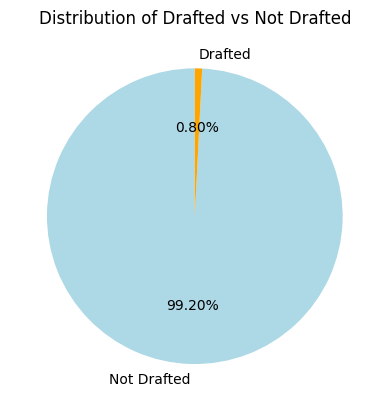

In [23]:
# Plot the distribution of the target variable using a pie chart
plt.pie(drafted_counts, labels=['Not Drafted','Drafted'], autopct='%1.2f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Distribution of Drafted vs Not Drafted')

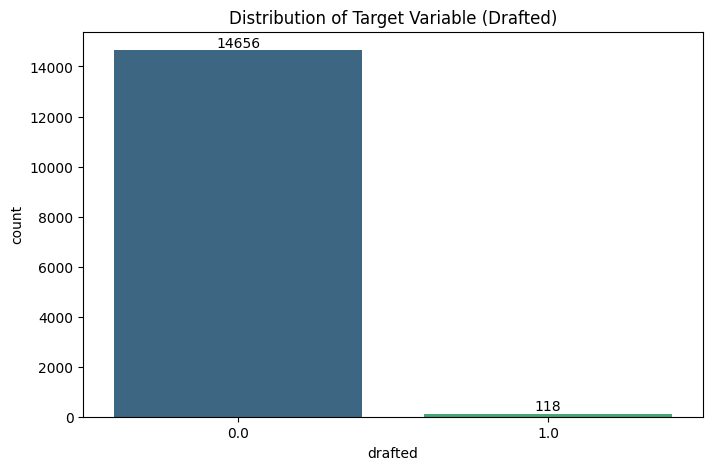

In [24]:
# plot the distribution of the target variable in a bar chart
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=target_name, data=train_df, palette='viridis')

# Add counts
for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Target Variable (Drafted)')
plt.show()


In [25]:
target_distribution_explanations = """
The target variable is highly imbalanced: about 99.2% of players were not drafted, while only 0.8% were drafted. 
This imbalance reflects the reality that only a very small fraction of college players make it to the NBA. 
However, it also introduces challenges for modeling, as most algorithms may default to predicting 'not drafted' and still achieve high accuracy, without truly identifying drafted players.

Key limitations include:
- Models may struggle to learn meaningful patterns for the drafted class due to its scarcity.
- Performance metrics like accuracy will be misleading; precision, recall, and F1-score are more informative.
- Oversampling, undersampling, or class-weighting techniques will be required to address imbalance.

Despite these issues, this distribution mirrors real-world conditions and must be handled carefully to avoid biased or unhelpful predictions.
"""


In [26]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `GP`

In [27]:
# Display the summary Statistics
train_df['GP'].describe()

count    14774.000000
mean        21.251726
std         10.517642
min          1.000000
25%         12.000000
50%         25.000000
75%         30.000000
max         41.000000
Name: GP, dtype: float64

Text(0, 0.5, 'Frequency')

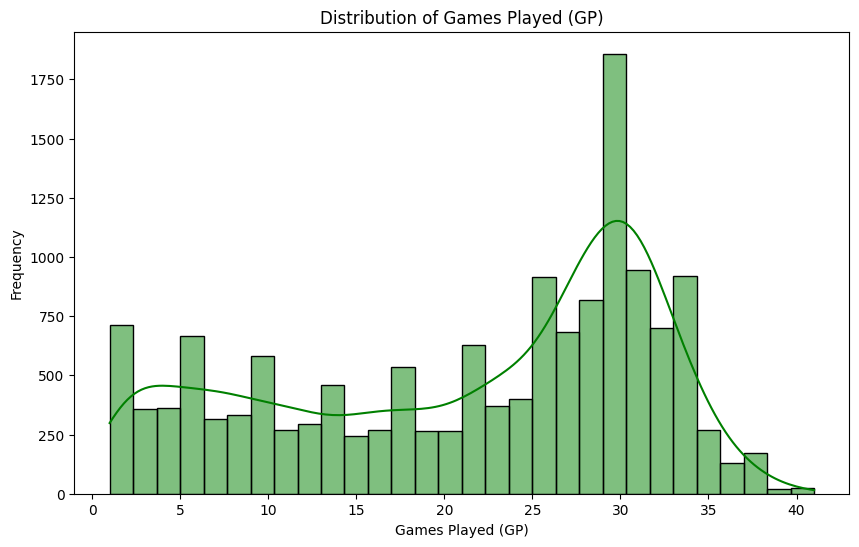

In [28]:
# Set the plot size for better visibility
plt.figure(figsize=(10, 6))
# Plot the distribution of Games Played (GP)
sns.histplot(train_df['GP'], bins=30, kde=True, color='green')
plt.title('Distribution of Games Played (GP)')
plt.xlabel('Games Played (GP)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

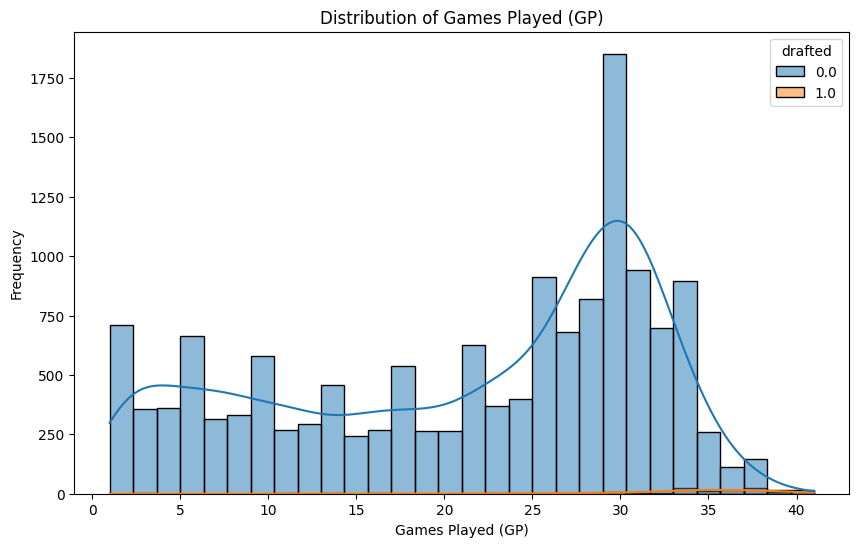

In [29]:
# Set the plot size for better visibility
plt.figure(figsize=(10, 6))
# Plot the distribution of Games Played (GP) with hue for drafted
sns.histplot(data=train_df, x='GP',hue='drafted', bins=30, kde=True, color='green')
plt.title('Distribution of Games Played (GP)')
plt.xlabel('Games Played (GP)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Games Played (GP)')

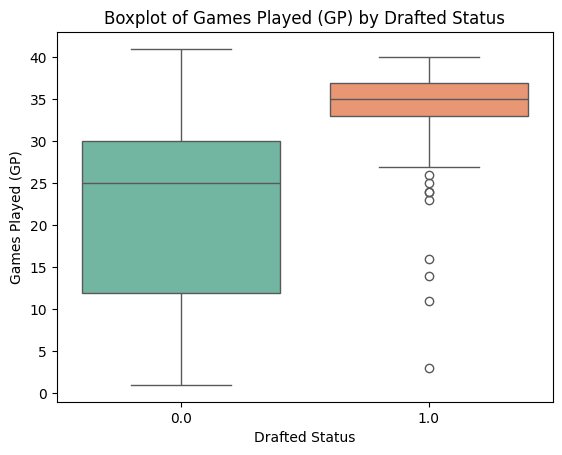

In [30]:
# Plot the boxplot of GP by drafted status
sns.boxplot(x='drafted', y='GP', data=train_df, palette='Set2')
# Set the title and labels for the boxplot
plt.title('Boxplot of Games Played (GP) by Drafted Status')
plt.xlabel('Drafted Status')
plt.ylabel('Games Played (GP)')

In [31]:
# Display the summary statistics of GP by drafted status
draft_group = train_df.groupby('drafted')['GP'].describe()
print(draft_group)

           count       mean        std  min   25%   50%   75%   max
drafted                                                            
0.0      14656.0  21.148472  10.484129  1.0  12.0  25.0  30.0  41.0
1.0        118.0  34.076271   5.702236  3.0  33.0  35.0  37.0  40.0


In [32]:
feature_1_insights = """
The feature 'Games Played (GP)' ranges from 1 to 41 games, with an average of about 21 games. 
The distribution is moderately spread, with most players falling between 12 (25th percentile) and 30 (75th percentile) games. 
The histogram shows a right-skewed distribution, indicating that while many players participate in a  moderate number of games, a smaller proportion play in either very few or nearly  the maximum number of games.

When broken down by drafted status, drafted players tend to have a slightly higher median and upper quartile GP compared to non-drafted players. 
This suggests that consistent playing time (more games played) may correlate positively with the likelihood of being drafted, although overlap between groups remains substantial.

Key limitations and issues:
- GP alone may not be a sufficient predictor, as players can accumulate high GP without necessarily demonstrating draft-worthy performance.
- Players with injuries or from shorter seasons may have lower GP, which can misrepresent their actual talent or draft potential.
- Contextual factors like league differences, competition strength, and team strategies are not captured in this variable.
- Since GP is not normally distributed and shows skewness, normalization or transformation may improve its usefulness in certain models.

Overall, 'Games Played' is an informative but limited feature. 
It provides insight into player availability and durability, but must be considered alongside performance statistics for a more accurate understanding of draft potential.
"""


In [33]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `pts`

In [34]:
# Display the summary statistics
train_df['pts'].describe()

count    14773.000000
mean         3.662676
std          3.623175
min          0.000000
25%          1.000000
50%          2.448300
75%          5.363600
max         27.375000
Name: pts, dtype: float64

Text(0, 0.5, 'Frequency')

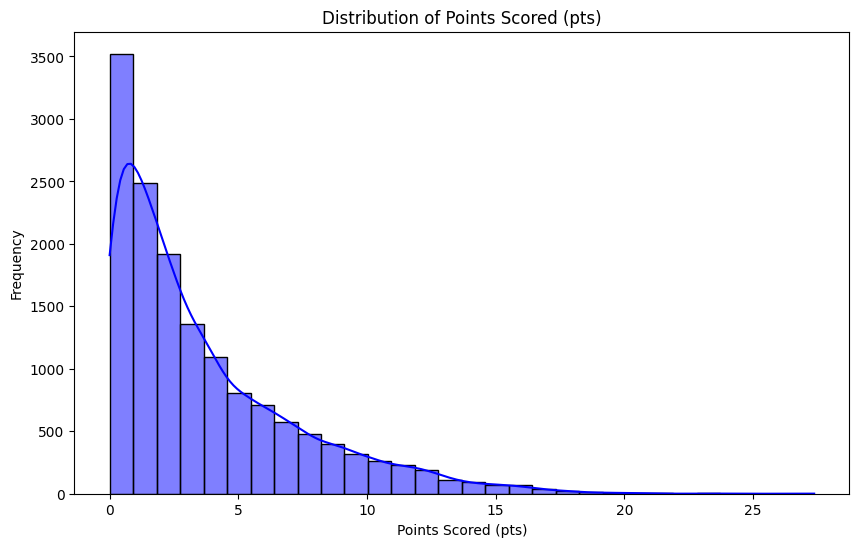

In [35]:
# Set the plot size for better visibility
plt.figure(figsize=(10, 6))
# Plot the distribution of Points Scored (pts)
sns.histplot(train_df['pts'], bins=30, kde=True, color='blue')
plt.title('Distribution of Points Scored (pts)')
plt.xlabel('Points Scored (pts)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Points Scored (pts)')

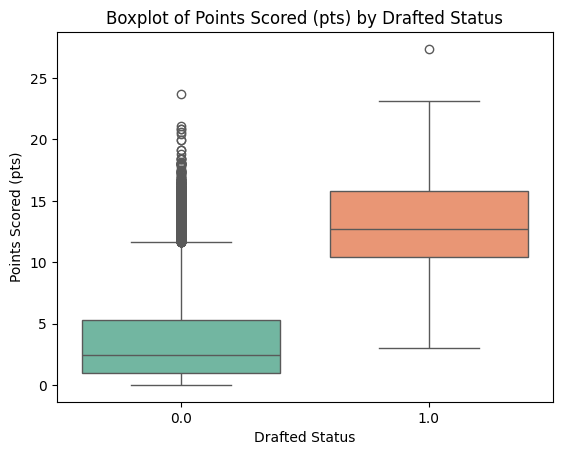

In [36]:
# Plot the boxplot of pts by drafted status
sns.boxplot(x='drafted', y='pts', data=train_df, palette='Set2')
# Set the title and labels for the boxplot
plt.title('Boxplot of Points Scored (pts) by Drafted Status')
plt.xlabel('Drafted Status')
plt.ylabel('Points Scored (pts)')

In [37]:
# Display the summary statistics of pts by drafted status
draft_group = train_df.groupby('drafted')['pts'].describe()
print(draft_group)

           count       mean       std  min      25%      50%      75%     max
drafted                                                                      
0.0      14655.0   3.587417  3.518962  0.0   1.0000   2.4194   5.2500  23.697
1.0        118.0  13.009357  4.200623  3.0  10.4271  12.6948  15.7941  27.375


In [38]:
feature_2_insights = """
The feature 'pts' (Points Scored) shows a highly skewed distribution, with most players scoring between 0 and 6 points, while a few reach values as high as 27.4. 
The mean score is around 3.66, but the long tail on the higher end indicates the presence of outliers (exceptional high-performing players). 
When broken down by drafted status, we see a clear separation: drafted players have a much higher mean score (≈13.0) compared to non-drafted players (≈3.6). 
This suggests that 'pts' is a strong predictor of drafting likelihood. 

However, there are limitations: 
1. The feature may be influenced by playing time, team role, or context (not captured in the dataset). 
2. Outliers can bias models if not handled properly. 
3. The imbalance between drafted and non-drafted groups means the relationship may be overstated.

Overall, 'pts' is a highly informative feature but should be normalized or scaled, and potential outliers should be carefully considered during modeling.
"""

In [39]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `usg`


In [40]:
# Display the summary statistics
train_df['usg'].describe()


count    14774.000000
mean        17.256674
std          6.332899
min          0.000000
25%         13.900000
50%         17.200000
75%         20.600000
max         50.000000
Name: usg, dtype: float64

Text(0, 0.5, 'Frequency')

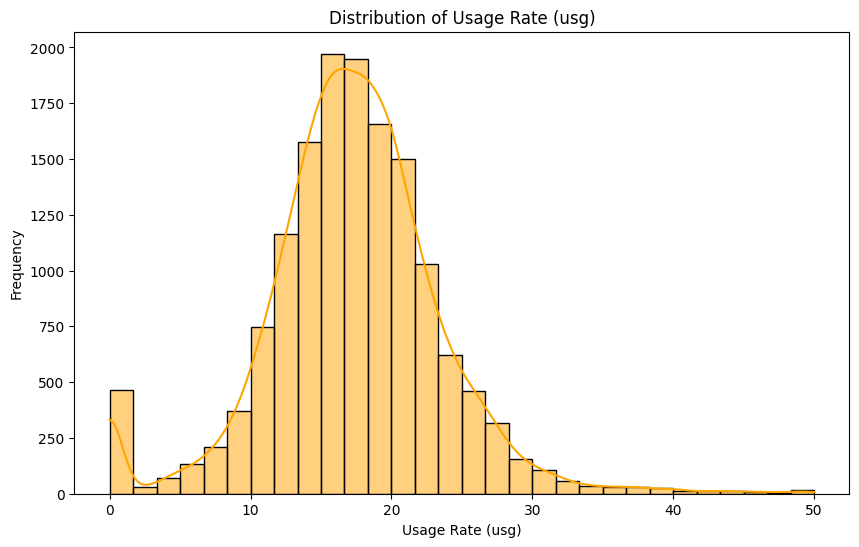

In [41]:
# Set the plot size for better visibility
plt.figure(figsize=(10, 6))
# Plot the distribution of Usage Rate (usg)
sns.histplot(train_df['usg'], bins=30, kde=True, color='orange')
plt.title('Distribution of Usage Rate (usg)')
plt.xlabel('Usage Rate (usg)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Usage Rate (usg)')

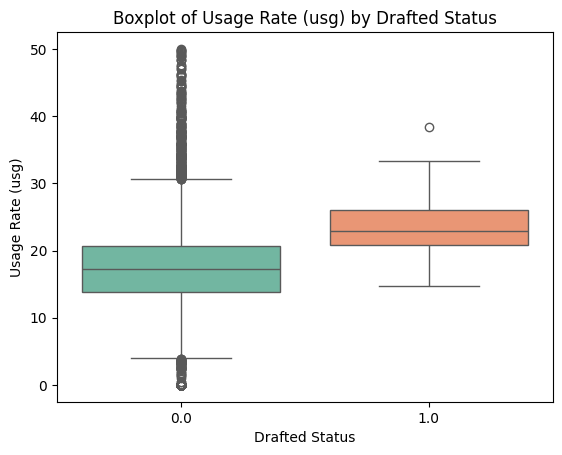

In [42]:
# Plot the distribution of Usage Rate (usg) with hue for drafted
sns.boxplot(x='drafted', y='usg', data=train_df, palette='Set2')
# Set the title and labels for the boxplot
plt.title('Boxplot of Usage Rate (usg) by Drafted Status')
plt.xlabel('Drafted Status')
plt.ylabel('Usage Rate (usg)')

In [43]:
# Display the summary statistics of usg by drafted status
draft_group = train_df.groupby('drafted')['usg'].describe()
print(draft_group)

           count       mean       std   min   25%   50%     75%   max
drafted                                                              
0.0      14656.0  17.206004  6.321502   0.0  13.9  17.2  20.600  50.0
1.0        118.0  23.550000  4.271667  14.7  20.8  22.9  25.975  38.4


In [44]:
feature_3_insights = """
The feature 'usg' (Usage Rate) measures the percentage of team plays a player is involved in while on the court. 
The overall distribution is approximately bell-shaped with a slight right skew, ranging from 0 to 50. 
Most players fall within the 13–21 range, with a mean around 17.25. A small number of outliers reach extreme values (close to 50), 
likely reflecting star players who dominate possession.

When separated by drafted status, a clear distinction emerges: drafted players have a significantly higher mean usage rate (≈23.6) 
compared to non-drafted players (≈17.2). This suggests that higher involvement in plays strongly correlates with being drafted. 
However, the drafted group also shows less variability (lower standard deviation), indicating that drafted players consistently 
maintain high usage levels, whereas non-drafted players show wider variation.

Limitations and issues:
1. Usage rate may depend on team context, coaching style, or league role, not purely individual skill. 
2. Extremely high values could be inflated due to small sample sizes (few games or minutes). 
3. The imbalance between drafted (118) and non-drafted (14,656) players could bias interpretation of the relationship. 

Overall, 'usg' is a strong and informative predictor of drafting likelihood, but outliers and contextual dependencies 
should be accounted for during modeling (e.g., through normalization or robustness checks).
"""


In [45]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_3_insights)

### C.7 Explore Feature of Interest `ht`

In [46]:
# Display the summary statistics
train_df['ht'].describe()

count     14766
unique       32
top       8-Jun
freq       1440
Name: ht, dtype: object

In [47]:
train_df['ht'].value_counts()

ht
8-Jun     1440
4-Jun     1418
3-Jun     1413
5-Jun     1390
7-Jun     1387
6-Jun     1321
2-Jun     1264
9-Jun     1013
1-Jun      954
Jun-00     824
10-Jun     626
11-May     448
10-May     366
11-Jun     279
Jul-00     167
9-May      160
-           83
8-May       67
1-Jul       48
7-May       28
2-Jul       27
3-Jul       12
Apr-00      10
6-May        7
4-Jul        3
5-May        2
0            2
5-Jul        2
6-Jul        2
1-May        1
5-Apr        1
2-May        1
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

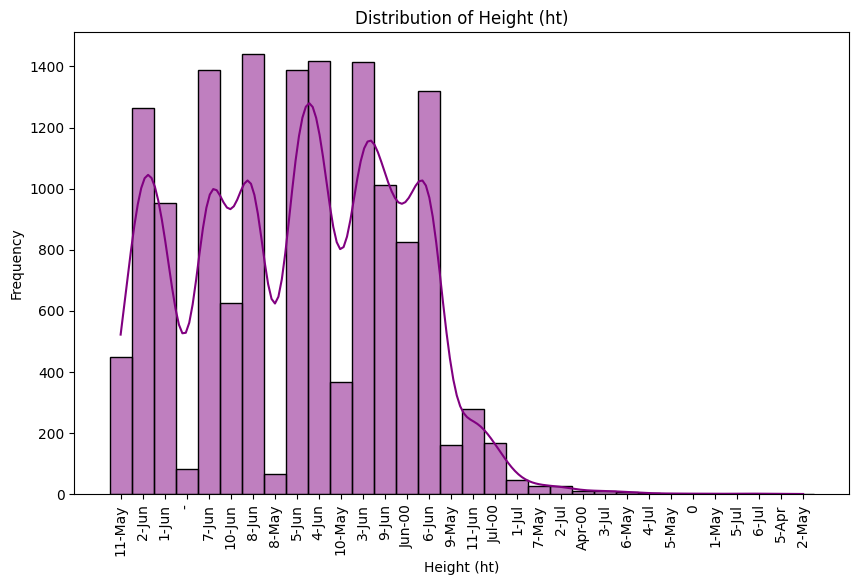

In [48]:
# Set the plot size for better visibility
plt.figure(figsize=(10, 6))
sns.histplot(train_df['ht'], bins=30, kde=True, color='purple')
plt.title('Distribution of Height (ht)')
plt.xlabel('Height (ht)')
plt.xticks(rotation=90)
plt.ylabel('Frequency') 

In [49]:
feature_4_insights = """
The 'ht' feature appears to represent player height, but it is currently stored in an incorrect 
format that resembles dates (e.g., '8-Jun', '11-May'). Based on context, these values likely 
correspond to heights in feet and inches. For example:
 - '1-Jun' ≈ 6'1" (185 cm)
 - '11-May' ≈ 5'11" (180 cm)

Distribution Analysis:
- The feature has 32 unique values, with the most frequent being '8-Jun' (1440 players).
- The majority of values cluster around typical human height ranges, although represented incorrectly.
- There are some anomalies such as '0', '-', or misformatted entries that indicate missing or invalid data.

Limitations & Issues:
- Current string format prevents direct numerical analysis.
- Requires preprocessing to convert from the stored string (e.g., '8-Jun') to a numeric 
  height value (in cm or inches).
- Missing/invalid entries ('-', '0') will need to be cleaned or imputed.

Recommendation:
- Apply feature engineering to map these pseudo-date values into proper height measurements. 
- Once converted, the feature can be reliably used in modeling to capture player physical 
  attributes, which may impact performance outcomes.
"""


In [50]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_4_insights)

---
## D. Feature Selection


### D.1 Approach 1 - "Correlation Analysis"

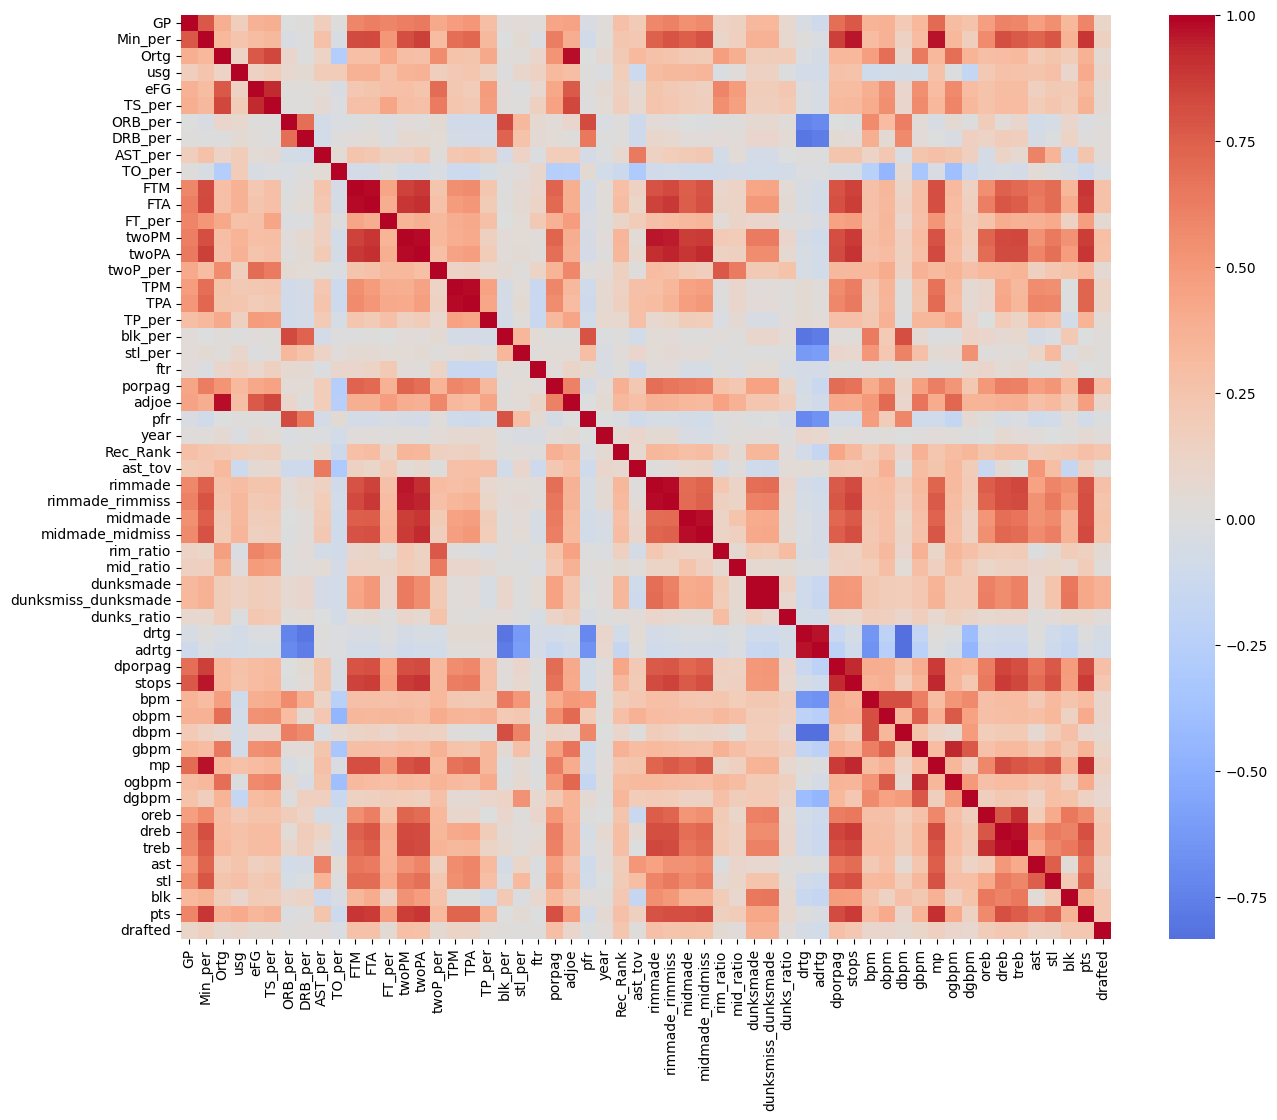

In [51]:
# Select only numerical columns
df_numeric = train_df.select_dtypes(include=['number'])

# set the plot size for better visibility
plt.figure(figsize=(15, 12))  
# Plot the correlation heatmap
sns.heatmap(df_numeric.corr(), annot=False, cmap='coolwarm', center=0)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [52]:
# set the threshold for high correlation
threshold = 0.75
# Calculate the correlation matrix and filter for high correlations
corr_matrix = df_numeric.corr().abs()
high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
             .stack()
             .reset_index())
high_corr.columns = ['feature1', 'feature2', 'correlation']
high_corr = high_corr[high_corr['correlation'] > threshold]
print(high_corr)


             feature1             feature2  correlation
0                  GP              Min_per     0.775328
39                 GP                stops     0.777779
63            Min_per                  FTM     0.827731
64            Min_per                  FTA     0.834096
66            Min_per                twoPM     0.817297
67            Min_per                twoPA     0.856798
82            Min_per      rimmade_rimmiss     0.792214
83            Min_per              midmade     0.756082
84            Min_per      midmade_midmiss     0.797889
92            Min_per              dporpag     0.861771
93            Min_per                stops     0.963390
98            Min_per                   mp     0.968576
102           Min_per                 dreb     0.807848
103           Min_per                 treb     0.763773
105           Min_per                  stl     0.778272
107           Min_per                  pts     0.886732
110              Ortg                  eFG     0

In [53]:
# Set correlation threshold
threshold = 0.75

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Features to drop due to high correlation:", to_drop)

# Drop them from dataframe
train_df_reduced= train_df.drop(columns=to_drop)

print(f"Original features: {train_df.shape[1]}, After removal: {train_df_reduced.shape[1]}")

Features to drop due to high correlation: ['Min_per', 'eFG', 'TS_per', 'FTM', 'FTA', 'twoPM', 'twoPA', 'TPA', 'blk_per', 'adjoe', 'pfr', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'dunksmiss_dunksmade', 'drtg', 'adrtg', 'dporpag', 'stops', 'obpm', 'dbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'pts']
Original features: 62, After removal: 30


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5]),
 [Text(0, 0.5, 'GP'),
  Text(0, 1.5, 'Min_per'),
  Text(0, 2.5, 'Ortg'),
  Text(0, 3.5, 'usg'),
  Text(0, 4.5, 'eFG'),
  Text(0, 5.5, 'TS_per'),
  Text(0, 6.5, 'ORB_per'),
  Text(0, 7.5, 'DRB_per'),
  Text(0, 8.5, 'AST_per'),
  Text(0, 9.5, 'TO_per'),
  Text(0, 10.5, 'FTM'),
  Text(0, 11.5, 'FTA'),
  Text(0, 12.5, 'FT_per'),
  Text(0, 13.5, 'twoPM'),
  Text(0, 14.5, 'twoPA'),
  Text(0, 15.5, 'twoP_per'),
  Text(0, 16.5, 'TPM'),
  Text(0, 17.5, 'TPA'),
  Text(0, 18.5, 'TP_per'),
  Text(0, 19.5, 'blk_per'),
  Text(0, 20.5, 'stl_per'),
  Text(0, 21.5, 'ftr'),
  Text(0, 22.5, 'porpag'),
  Text(0, 23.5, 'adjoe')

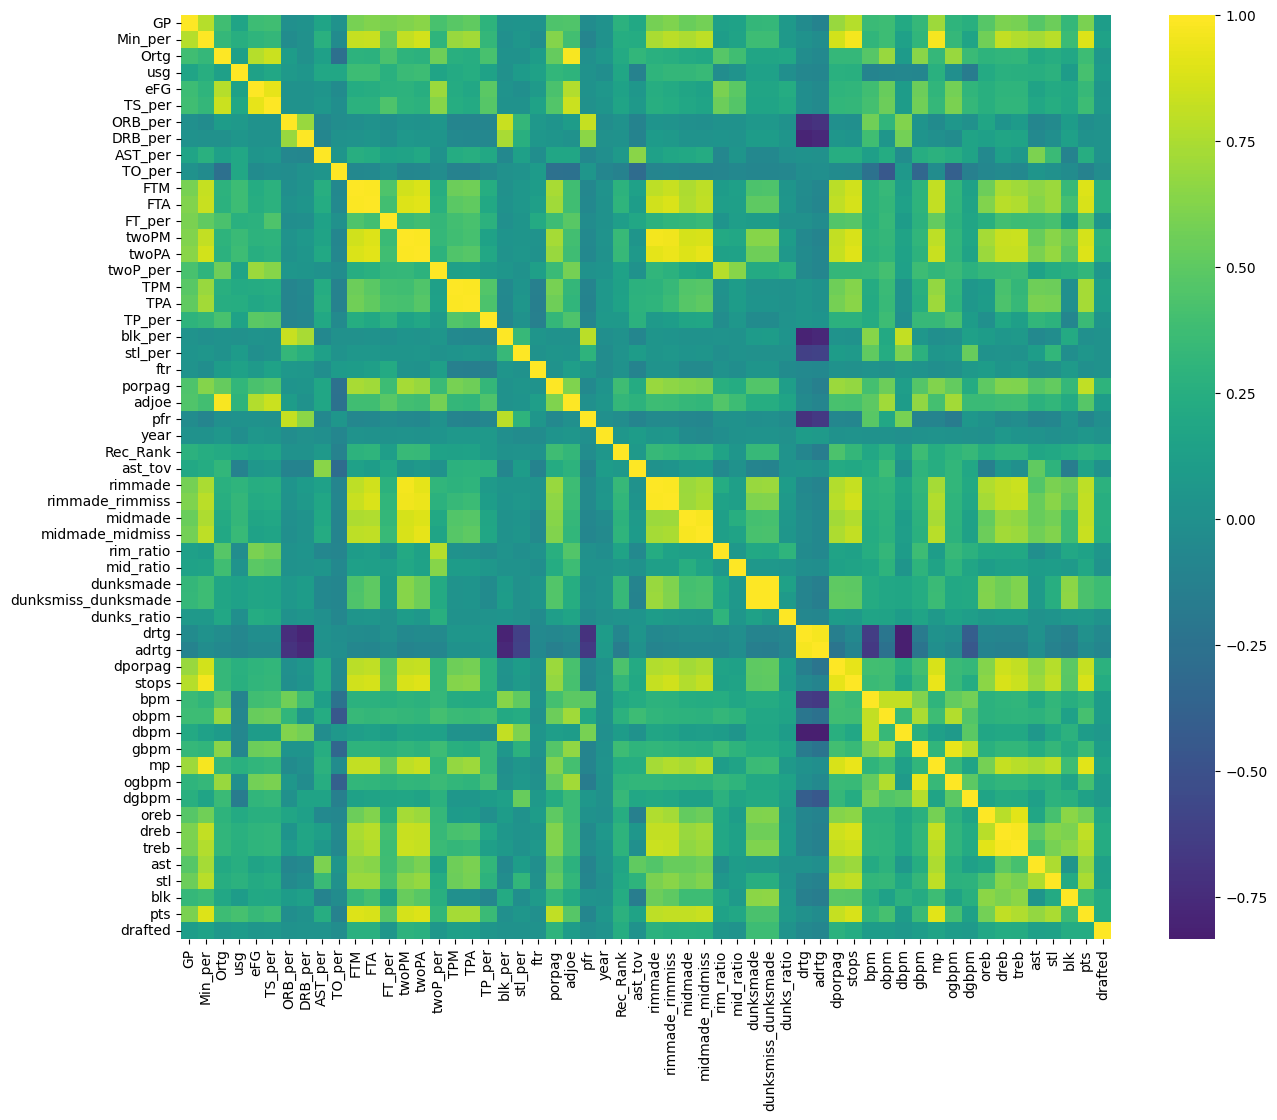

In [54]:
# Select only numerical columns
train_df_numeric = train_df_reduced.select_dtypes(include=['number'])

plt.figure(figsize=(15, 12))  # Bigger figure
sns.heatmap(df_numeric.corr(), annot=False, cmap='viridis', center=0)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [55]:
feature_selection_1_insights = """
For this project, we used correlation analysis as the first approach for feature selection. The rationale is that highly correlated features often carry redundant information, which can lead to multicollinearity in models, overfitting, and reduced interpretability. By analyzing the correlation matrix of numerical features, we identified pairs of features with correlation above a threshold of 0.75. These included combinations such as FTM-FTA, twoPM-twoPA, rimmade-rimmade_rimmiss, and many others that capture similar performance metrics.

As a result, we dropped 32 features that were highly correlated, reducing the total number of numerical features from 62 to 30. This approach ensures that the model focuses on independent and meaningful features, improves training efficiency, and mitigates the risk of multicollinearity while preserving predictive power.
"""

In [56]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach 2 - "Knowledge Driven Selection"


In [57]:
# Display the information of the reduced dataset
train_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14774 entries, 0 to 14773
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         14774 non-null  object 
 1   conf         14774 non-null  object 
 2   GP           14774 non-null  int64  
 3   Ortg         14774 non-null  float64
 4   usg          14774 non-null  float64
 5   ORB_per      14774 non-null  float64
 6   DRB_per      14774 non-null  float64
 7   AST_per      14774 non-null  float64
 8   TO_per       14774 non-null  float64
 9   FT_per       14774 non-null  float64
 10  twoP_per     14774 non-null  float64
 11  TPM          14774 non-null  int64  
 12  TP_per       14774 non-null  float64
 13  stl_per      14774 non-null  float64
 14  ftr          14774 non-null  float64
 15  yr           14774 non-null  object 
 16  ht           14766 non-null  object 
 17  porpag       14774 non-null  float64
 18  year         14774 non-null  int64  
 19  type

In [58]:
train_df_reduced.isna().sum()

team              0
conf              0
GP                0
Ortg              0
usg               0
ORB_per           0
DRB_per           0
AST_per           0
TO_per            0
FT_per            0
twoP_per          0
TPM               0
TP_per            0
stl_per           0
ftr               0
yr                0
ht                8
porpag            0
year              0
type              0
Rec_Rank       9885
ast_tov        1535
mid_ratio      3191
dunksmade      2075
dunks_ratio    9388
bpm               5
gbpm              5
blk               1
player_id         0
drafted           0
dtype: int64

In [59]:
train_df_reduced.columns

Index(['team', 'conf', 'GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per',
       'TO_per', 'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'yr',
       'ht', 'porpag', 'year', 'type', 'Rec_Rank', 'ast_tov', 'mid_ratio',
       'dunksmade', 'dunks_ratio', 'bpm', 'gbpm', 'blk', 'player_id',
       'drafted'],
      dtype='object')

In [60]:
columns_to_drop = ['team', 'conf', 'yr', 'year', 'type', 'Rec_Rank', 'ast_tov', 'mid_ratio',
       'dunksmade', 'dunks_ratio']

In [61]:
train_df_final = train_df_reduced.drop(columns=columns_to_drop)
print(f"Original features: {train_df_reduced.shape[1]}, After removal: {train_df_final.shape[1]}")

Original features: 30, After removal: 20


In [62]:
train_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14774 entries, 0 to 14773
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GP         14774 non-null  int64  
 1   Ortg       14774 non-null  float64
 2   usg        14774 non-null  float64
 3   ORB_per    14774 non-null  float64
 4   DRB_per    14774 non-null  float64
 5   AST_per    14774 non-null  float64
 6   TO_per     14774 non-null  float64
 7   FT_per     14774 non-null  float64
 8   twoP_per   14774 non-null  float64
 9   TPM        14774 non-null  int64  
 10  TP_per     14774 non-null  float64
 11  stl_per    14774 non-null  float64
 12  ftr        14774 non-null  float64
 13  ht         14766 non-null  object 
 14  porpag     14774 non-null  float64
 15  bpm        14769 non-null  float64
 16  gbpm       14769 non-null  float64
 17  blk        14773 non-null  float64
 18  player_id  14774 non-null  object 
 19  drafted    14774 non-null  float64
dtypes: flo

In [63]:
feature_selection_2_insights = """
In this approach, we applied knowledge-driven feature selection using domain expertise and data quality considerations. We removed columns such as 'team', 'conf', 'yr', 'year', and 'type' to eliminate potential bias that could arise from team affiliation, conference, or year-related information, which are not intrinsic to player performance.

Additionally, we removed features like 'Rec_Rank', 'ast_tov', 'mid_ratio', 'dunksmade', and 'dunks_ratio' because these columns contain a significant number of null values, which could negatively impact model performance and introduce noise.

This approach ensures that the final dataset focuses on relevant and high-quality features, balancing domain knowledge and statistical considerations, resulting in a cleaner, unbiased, and more reliable dataset for modeling NBA draft predictions.
"""

In [64]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

## D.3 Final Selection of Features

In [65]:
train_df_final.columns

Index(['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'ht', 'porpag',
       'bpm', 'gbpm', 'blk', 'player_id', 'drafted'],
      dtype='object')

In [66]:
# The list of features to be used for modeling

features_list = ['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'ht', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'player_id', 'drafted']

In [67]:
feature_selection_explanations = """
The selected features for modeling include key performance metrics, efficiency statistics, and player attributes that are most relevant for predicting NBA draft outcomes. 
Numerical features like 'GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'porpag', 'bpm', 'gbpm', and 'blk' capture on-court performance and impact. 
The 'ht' feature represents player height, which is an important physical attribute. 
'player_id' serves as a unique identifier, while 'drafted' is the target variable. 
Additionally, 'pts' (points scored) was included despite being correlated with other features, as it is a crucial indicator of a player's scoring ability and overall impact on the game. 
These features combine statistical performance, physical traits, and efficiency measures to provide a comprehensive basis for predicting draft likelihood.
"""


In [68]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

In [69]:
# Make a final DataFrame with the selected features
train_df_final = train_df[features_list]
test_df_final = test_df[features_list[:-1]]  # Exclude 'drafted' from test set

### E.1 Data Transformation - Fixing ht Format

In [70]:
train_df_final['ht'].unique()

array(['11-May', '2-Jun', '1-Jun', '-', '7-Jun', '10-Jun', '8-Jun',
       '8-May', '5-Jun', '4-Jun', '10-May', '3-Jun', '9-Jun', 'Jun-00',
       '6-Jun', '9-May', '11-Jun', 'Jul-00', '1-Jul', '7-May', '2-Jul',
       'Apr-00', '3-Jul', '6-May', '4-Jul', '5-May', '0', '1-May',
       '5-Jul', '6-Jul', '5-Apr', nan, '2-May'], dtype=object)

In [71]:
num_dashes = (train_df_final["ht"] == "-").sum()
print(f"Number of '-' entries in ht column: {num_dashes}")

Number of '-' entries in ht column: 83


In [72]:
# Month abbreviation to feet mapping
month_to_feet = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

def convert_height(val):
    if pd.isna(val) or val.strip() in ["-", ""]:
        return np.nan
    val = val.strip().lower()
    
    try:
        if "-" in val:
            parts = val.split("-")
            # Case like "jun-00"
            if parts[0].isalpha():
                feet = month_to_feet.get(parts[0], np.nan)
                inches = int(parts[1]) if parts[1].isdigit() else 0
            # Case like "11-may" 
            elif parts[1].isalpha():
                feet = month_to_feet.get(parts[1], np.nan)
                inches = int(parts[0]) if parts[0].isdigit() else 0
            else:
                return np.nan
            if not np.isnan(feet):
                return feet * 12 + inches
        return np.nan
    except:
        return np.nan

In [73]:
# Apply conversion on train_df_final
train_df_final["height_inches"] = train_df_final["ht"].apply(convert_height)
train_df_final["height_cm"] = train_df_final["height_inches"] * 2.54

# Check results
train_df_final[["ht", "height_inches", "height_cm"]].head(20)


,ht,height_inches,height_cm
0,11-May,71.0,180.34
1,2-Jun,74.0,187.96
2,1-Jun,73.0,185.42
3,1-Jun,73.0,185.42
4,2-Jun,74.0,187.96
5,-,NaN,NaN
6,-,NaN,NaN
7,1-Jun,73.0,185.42
8,2-Jun,74.0,187.96
9,7-Jun,79.0,200.66


In [74]:
# Apply conversion on test_df_final
test_df_final["height_inches"] = test_df_final["ht"].apply(convert_height)
test_df_final["height_cm"] = test_df_final["height_inches"] * 2.54

# Check results
test_df_final[["ht", "height_inches", "height_cm"]].head(20)

,ht,height_inches,height_cm
0,6-Jun,78.0,198.12
1,5-Jun,77.0,195.58
2,9-Jun,81.0,205.74
3,7-Jun,79.0,200.66
4,10-Jun,82.0,208.28
5,5-Jun,77.0,195.58
6,10-Jun,82.0,208.28
7,4-Jun,76.0,193.04
8,7-Jun,79.0,200.66
9,10-Jun,82.0,208.28


In [75]:
# Check for null values in the new height column
print(f"Total nulls of height_cm in train_df_final: {train_df_final['height_cm'].isna().sum()}")
print(f"Total nulls iofn height_cm in test_df_final: {test_df_final['height_cm'].isna().sum()}")

Total nulls of height_cm in train_df_final: 93
Total nulls iofn height_cm in test_df_final: 6


In [76]:
# Drop the original 'ht' and 'height_inches' columns
train_df_final = train_df_final.drop(columns=['ht', 'height_inches'])
test_df_final = test_df_final.drop(columns=['ht', 'height_inches'])

In [77]:
# <Student to fill this section>
data_cleaning_1_explanations = """
The 'ht' (height) feature in the original dataset was incorrectly stored as a mix of date-like strings (e.g., '1-Jun', '11-May') instead of representing actual player heights. 
This issue needed to be addressed because height is a critical physical attribute that can strongly influence NBA draft decisions. 
Without proper conversion, the model would misinterpret or ignore this feature, potentially reducing prediction accuracy. 
By converting 'ht' to a numeric format in inches and centimeters, we ensure the feature can be effectively used in modeling. 
This transformation also allows consistent scaling and comparisons with other numerical features, improving model reliability. 
Handling missing values like ('-', NaN) prevents errors and ensures data quality.
"""

In [78]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### Use of Custom Package Datacheck

In [79]:
# Import Custom Package datacheck
from shash.dataprep import datacheck

In [80]:
datacheck(train_df_final)

,dtype,missing_count,missing_percent,unique_values
height_cm,float64,93,0.629484,30
gbpm,float64,5,0.033843,12260
bpm,float64,5,0.033843,12252
pts,float64,1,0.006769,3453
blk,float64,1,0.006769,694
stl_per,float64,0,0.0,164
drafted,float64,0,0.0,2
player_id,object,0,0.0,12155
porpag,float64,0,0.0,12257
ftr,float64,0,0.0,972


In [81]:
datacheck(test_df_final)

,dtype,missing_count,missing_percent,unique_values
height_cm,float64,6,0.462606,21
Ortg,float64,0,0.0,615
player_id,object,0,0.0,1297
pts,float64,0,0.0,808
blk,float64,0,0.0,244
gbpm,float64,0,0.0,1297
bpm,float64,0,0.0,1297
porpag,float64,0,0.0,1293
ftr,float64,0,0.0,466
stl_per,float64,0,0.0,71


### E.2 Data Transformation - Fixing Duplicate Values 

In [82]:
# Drop duplicates in the train final DataFrame
train_df_final = train_df_final.drop_duplicates()

In [83]:
data_cleaning_2_explanations = """
From the data check, we found 2462 duplicates in train_df_final and 0 in test_df_final. 
Dropping these duplicates is important to avoid bias from repeated records. 
Duplicates can distort patterns, cause overfitting, and unnecessarily inflate dataset size. 
Removing them makes the dataset cleaner, fairer, and more reliable for modeling.
"""


In [84]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Data Transformation - Fixing Missing Values

In [85]:
# Drop rows with missing values in the final train DataFrames
train_df_final.dropna(inplace=True)

In [86]:
from sklearn.impute import SimpleImputer

# Create imputer (we can choose "mean", "median", "most_frequent", or "constant")
imputer = SimpleImputer(strategy="constant")

# Fit & transform the column (must reshape to 2D)
test_df_final['height_cm'] = imputer.fit_transform(
    test_df_final[['height_cm']]
)


In [87]:
# Check for missing values in the train final DataFrame
train_df_final.isna().sum()

GP           0
Ortg         0
usg          0
ORB_per      0
DRB_per      0
AST_per      0
TO_per       0
FT_per       0
twoP_per     0
TPM          0
TP_per       0
stl_per      0
ftr          0
porpag       0
bpm          0
gbpm         0
blk          0
pts          0
player_id    0
drafted      0
height_cm    0
dtype: int64

In [88]:
# Check for missing values in the test final DataFrame
test_df_final.isna().sum()

GP           0
Ortg         0
usg          0
ORB_per      0
DRB_per      0
AST_per      0
TO_per       0
FT_per       0
twoP_per     0
TPM          0
TP_per       0
stl_per      0
ftr          0
porpag       0
bpm          0
gbpm         0
blk          0
pts          0
player_id    0
height_cm    0
dtype: int64

In [89]:
data_cleaning_3_explanations = """
Handling missing values is essential to ensure data consistency and prevent errors during model training. 
In train_df_final, we dropped rows with missing values to maintain reliable patterns. 
However, in test_df_final, dropping rows caused issues when submitting predictions to the Kaggle competition, 
as the row count must remain unchanged. To fix this, we used constant imputation for 'height_cm', ensuring 
the model can still evaluate unseen data without being biased by missing entries. 
This approach improves model stability, fairness, and predictive accuracy while keeping the test data structure intact.
"""


In [90]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

---
## F. Feature Engineering

### F.1 New Feature "Height_Impact"


In [91]:
# Feature Engineering: Create new feature Height_Impact = height_cm * bpm
train_df_final["Height_Impact"] = train_df_final["height_cm"] * train_df_final["bpm"] 
test_df_final["Height_Impact"] = test_df_final["height_cm"] * test_df_final["bpm"]  

In [92]:
feature_engineering_1_explanations = """
The 'Height_Impact' feature was created by combining a player's height with their box plus-minus (BPM). 
This captures how a player's physical attributes interact with their on-court performance. 
Taller players with higher BPM may contribute more effectively to the team's performance, 
while shorter players with high BPM may indicate exceptional skill. 
By engineering this feature, we allow the model to learn potential synergies between physical 
measurements and performance metrics, which can improve predictive power and provide 
deeper insights into player effectiveness.
"""

In [93]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "REB_per"




In [94]:
# Feature Engineering: Create new feature REB_per = ORB_per + DRB_per
train_df_final["REB_per"] = train_df_final["ORB_per"] + train_df_final["DRB_per"]   # Total rebounds %
test_df_final["REB_per"] = test_df_final["ORB_per"] + test_df_final["DRB_per"]  # Total rebounds %

In [95]:
feature_engineering_2_explanations = """
The 'REB_per' feature combines offensive rebound percentage (ORB_per) and defensive rebound percentage (DRB_per) to represent a player's total rebounding contribution. 
Instead of analyzing offensive and defensive rebounds separately, this aggregated metric provides a clearer measure of overall rebounding ability. 
Rebounds are crucial for both ending opponent possessions and creating second-chance opportunities, 
so capturing a player's full rebounding impact can improve model accuracy in evaluating player performance.
"""

In [96]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "FT_efficiency"



In [97]:
# Feature Engineering: Create new feature FT_efficiency = FT_per * ftr
train_df_final["FT_efficiency"] = train_df_final["FT_per"] * train_df_final["ftr"]   
test_df_final["FT_efficiency"] = test_df_final["FT_per"] * test_df_final["ftr"]  

In [98]:
feature_engineering_3_explanations = """
The 'FT_efficiency' feature captures a player's overall effectiveness in free throws by combining 
their free throw percentage (FT_per) with their free throw attempt rate (ftr). This metric not only 
reflects shooting accuracy but also accounts for how frequently a player gets to the free-throw line, 
providing a more comprehensive measure of scoring reliability from free throws. Including this feature 
can help the model better evaluate a player's scoring efficiency and potential impact on games.
"""

In [99]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_3_explanations)

---
## G. Data Preparation for Modeling

In [100]:
train_df_final.columns

Index(['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'player_id', 'drafted', 'height_cm',
       'Height_Impact', 'REB_per', 'FT_efficiency'],
      dtype='object')

In [101]:
test_df_final.columns

Index(['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'player_id', 'height_cm', 'Height_Impact',
       'REB_per', 'FT_efficiency'],
      dtype='object')

In [102]:
# The final list of features after feature engineering
final_features = ['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'height_cm','Height_Impact', 'REB_per', 
       'FT_efficiency', 'player_id', 'drafted']

### G.1 Split Datasets

In [103]:
# import the necessary libraries for model training
from sklearn.model_selection import train_test_split

In [104]:
X = train_df_final.drop(['drafted','player_id'],axis=1)  # All columns except the target
y = train_df_final['drafted']  # Target column

In [105]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
X_test = test_df_final.drop(['player_id'],axis=1)  # All columns equal to X_train
y_test = test_df_final['player_id']  # player_id for submission

In [107]:
data_splitting_explanations = """
For this dataset, we applied an 80/20 train-validation split using stratified sampling based on the target variable 'drafted'. 
This ensures that the class distribution (drafted vs. not drafted) is preserved across both training and validation sets, 
which is especially important in case of class imbalance. The training set is used to fit the model, while the validation set 
is reserved for tuning hyperparameters and evaluating generalization performance before testing on unseen data. 

The test dataset provided by the competition does not include labels, so we use it only for generating predictions for submission. 
Importantly, we avoid dropping rows in the test dataset (even if duplicates exist) because Kaggle requires predictions for every 
row in the test file, and removing rows would cause submission errors. This strategy ensures consistency between train, 
validation, and test sets while maximizing the robustness of the model evaluation.
"""

In [108]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

---
## H. Save Datasets

In [109]:
# Since all the team members are using the same notebook format , I will create a folder named data_shash to save my datasets
# This will avoid any conflicts when merging the notebooks later

# Import pathlib to create folders
from pathlib import Path

# Create a simple object to hold folder_path
class AT:
    def __init__(self, folder_path):
        self.folder_path = Path(folder_path)
        self.folder_path.mkdir(parents=True, exist_ok=True)

# Go one level up from notebooks/ and create data_shash folder at repo root
at = AT("../data_shash")


In [110]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

---
## I. Selection of Performance Metrics

In [111]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, ConfusionMatrixDisplay,confusion_matrix,
    classification_report
)

In [112]:
performance_metrics_explanations = """
For this NBA draft prediction task, multiple performance metrics are considered to provide a well-rounded evaluation. 
Accuracy alone may not be sufficient, especially if the dataset is imbalanced (i.e., fewer players get drafted compared 
to those who don’t). Therefore, precision, recall, and F1-score are included to better capture the trade-offs between 
false positives and false negatives. 

- Precision: helps us understand how many of the players predicted as drafted are actually drafted, which is important 
  when we want to minimize false positives. 
- Recall tells us how many of the actual drafted players were correctly identified, which is critical if the goal is 
  to avoid missing potential talents. 
- F1-score balances precision and recall, making it a strong overall measure when both false positives and false negatives 
  are costly. 
- ROC-AUC is included to evaluate the model’s ability to discriminate between drafted and not drafted players across 
  different thresholds. 
- Confusion Matrix provides a clear breakdown of true positives, true negatives, false positives, and false negatives 
  for better interpretability. 

Using these combined metrics gives a more complete view of model performance and ensures that the evaluation is not biased 
towards a single aspect of prediction.
"""


In [113]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

---
## J. Train Machine Learning Model

### J.1 Import Algorithm


In [114]:
from sklearn.dummy import DummyClassifier

In [115]:
algorithm_selection_explanations = """
We start with a DummyClassifier as a baseline model. The purpose of this algorithm is not to achieve high performance, 
but to establish a reference point against which all other models can be compared. The DummyClassifier generates 
predictions using simple strategies such as predicting the most frequent class or random guessing. 

This is important because:
- It allows us to measure whether more complex models are actually learning meaningful patterns in the data 
  rather than performing only slightly better than random chance.
- It helps identify whether the dataset is inherently challenging (e.g., due to imbalance or noise).
- It ensures transparency, as we can demonstrate improvements over a naïve baseline when justifying the use of 
  more advanced models. 

In short, the DummyClassifier is a good fit for initial evaluation since it provides a benchmark for minimum 
expected performance before applying machine learning algorithms that leverage the full feature set.
"""


In [116]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters


In [117]:
baseline_model = DummyClassifier(strategy='most_frequent')

In [118]:
hyperparameters_selection_explanations = """
For the DummyClassifier, the key hyperparameter is 'strategy'. We use 'most_frequent' to create a simple, 
consistent baseline that predicts the majority class. This provides a benchmark to compare against more 
advanced models and tuning later on.
"""

In [119]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [120]:
baseline_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

### J.4 Model Technical Performance

In [121]:
# ✅ Get predicted labels
y_pred_train = baseline_model.predict(X_train)
y_pred_val = baseline_model.predict(X_val)

# ✅ Get predicted probabilities (only needed for ROC AUC, log loss, etc.)
y_proba_train = baseline_model.predict_proba(X_train)[:, 1]  # probability of class 1
y_proba_val = baseline_model.predict_proba(X_val)[:, 1]  # probability of class 1

In [122]:
# Import the evaluation function from the custom package
from shash.evaluation import evaluate_model


--- Train Set Evaluation ---
Accuracy : 0.9917
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000
ROC AUC  : 0.5000

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      9701
         1.0       0.00      0.00      0.00        81

    accuracy                           0.99      9782
   macro avg       0.50      0.50      0.50      9782
weighted avg       0.98      0.99      0.99      9782

Confusion Matrix (Raw Counts):
[[9701    0]
 [  81    0]]


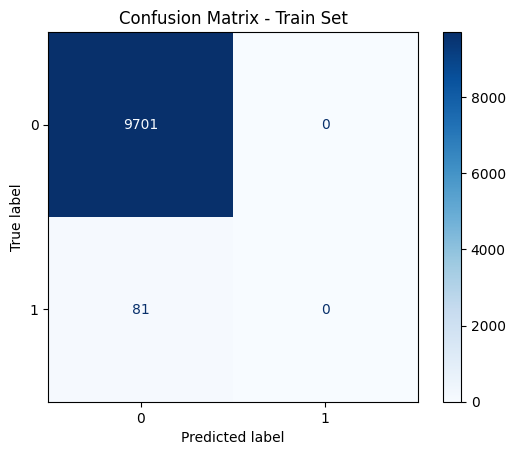

In [123]:
# Train evaluation
evaluate_model(y_train, y_pred_train, y_proba_train, dataset_name="Train Set")


--- Validation Set Evaluation ---
Accuracy : 0.9935
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000
ROC AUC  : 0.5000

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2430
         1.0       0.00      0.00      0.00        16

    accuracy                           0.99      2446
   macro avg       0.50      0.50      0.50      2446
weighted avg       0.99      0.99      0.99      2446

Confusion Matrix (Raw Counts):
[[2430    0]
 [  16    0]]


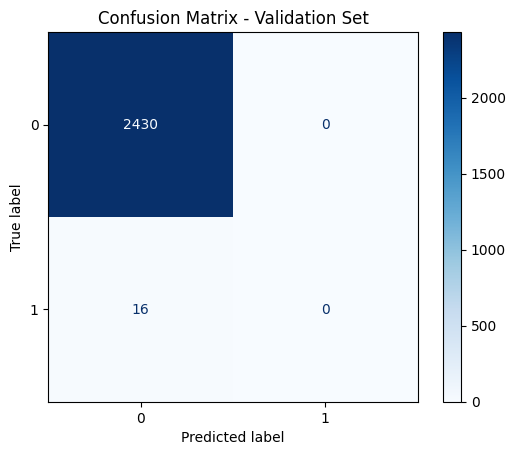

In [124]:
# Validation evaluation
evaluate_model(y_val, y_pred_val, y_proba_val, dataset_name="Validation Set")

In [125]:
# Get probabilities for the positive class from baseline model for the test dataset(X_test)
baseline_test_probs = baseline_model.predict_proba(X_test)[:, 1]

In [126]:
# Create output DataFrame with player_id and baseline probabilities
baseline_output_df = pd.DataFrame({
    'player_id': test_df_final['player_id'],
    'drafted': baseline_test_probs
})

In [127]:
# Save to CSV
baseline_output_df.to_csv("../predictions_shash/test_predictions_baseline.csv", index=False)

In [128]:
# <Student to fill this section>
model_performance_explanations = """
The DummyClassifier (most_frequent strategy) predicts only the majority class (not drafted).  
- Accuracy is very high (~99%) due to class imbalance.  
- Precision, Recall, and F1 for the minority class (drafted) are 0.0, showing the model completely fails to identify positive cases.  
- ROC AUC is 0.5, meaning no discriminative power.  

This confirms the baseline model is a weak benchmark and highlights the need for more advanced models that can detect the minority class.
"""

In [129]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

In [130]:
business_impacts_explanations = """
The baseline model always predicts the majority class (not drafted), leading to very high accuracy but zero recall for the drafted players. 
From a business perspective, this means the model completely fails to identify potential drafted players. 
This has high negative impact because the main objective is to correctly spot talented players for recruitment. 
False negatives (missing drafted players) are especially costly, as the business may lose opportunities to recruit top talent, 
while false positives (predicting drafted when not) are less critical at this stage. 
Therefore, the current model offers no real business value beyond serving as a performance benchmark.
"""

In [131]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [132]:
# <Student to fill this section>
experiment_outcome = """ Hypothesis Confirmed """

In [133]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [134]:
experiment_results_explanations = """
The dummy classifier achieved very high overall accuracy (~99%) by predicting the most frequent class (non-drafted players), which aligns with the expectation of a naïve baseline. 
However, it completely failed to identify drafted players, with precision, recall, and F1 scores for the drafted class being 0.0. 
This confirms that while overall accuracy can be misleading due to class imbalance, the model does not provide meaningful insights for the business objective of identifying potential draftees.

New insights gained:
- High accuracy alone is insufficient when the dataset is heavily imbalanced.
- A more sophisticated classifier is needed to correctly identify drafted players.
- Metrics like recall, F1-score, and ROC AUC for the minority class are critical for evaluating model usefulness.

Next steps:
1. Train a Logistic Regression model with class weighting to handle the imbalance between drafted and non-drafted players (expected uplift: high).
2. Perform feature scaling (standardization or normalization) as Logistic Regression is sensitive to feature magnitudes.
3. Evaluate model performance using minority-class-focused metrics: recall, F1-score, and ROC AUC, rather than overall accuracy, to ensure the model identifies drafted players effectively.
4. If imbalance still negatively impacts predictions, consider resampling techniques like SMOTE or oversampling only the drafted players to improve class balance.
5. Fine-tune hyperparameters such as regularization strength (C) and penalty type (L1/L2) using cross-validation to optimize predictive performance.
"""

In [135]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)